# example1_missing_value_summary

In [ ]:
# example1_missing_value_summary

import pandas as pd
import numpy as np

def main():
    # 샘플 데이터프레임 생성
    data = {
        'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, 4, np.nan],
        'C': ['foo', 'bar', 'baz', None, 'qux']
    }
    df = pd.DataFrame(data)

    # 기본 정보 출력
    print("=== DataFrame Info ===")
    print(df.info(), "\n")

    ### 결측치 최대인 부분 삭제
    nan_cnt = df.isnull().sum()
    nan_max_id = nan_cnt.idxmax() # 결측치가 가장 많은 컬럼의 이름
    print(f"=== Column with Maximum Missing Values: {nan_max_id} ===")
    df_max_nan = df.drop(nan_max_id, axis=1)  # 해당 컬럼 삭제
    print(df_max_nan, "\n")


    # 결측치 개수 요약
    print("=== Missing Value Count ===")
    print(df.isnull().sum(), "\n")

    # 비율로도 확인
    print("=== Missing Value Ratio ===")
    print((df.isnull().mean() * 100).round(2))

if __name__ == "__main__":
    main()


# example2_missing_value_drop

In [ ]:


import pandas as pd
import numpy as np

def main():
    data = {
        'A': [1, np.nan, 3, 4],
        'B': [5, 6, np.nan, 8],
        'C': [9, 10, 11, 12]
    }
    df = pd.DataFrame(data)
    print("=== Original DataFrame ===")
    print(df, "\n")

    # 행 단위로 결측치가 있는 모든 행 제거
    df_drop_rows = df.dropna(axis=0)
    print("=== Drop Rows with any NaN ===")
    print(df_drop_rows, "\n")

    # 열 단위로 결측치가 있는 모든 열 제거
    df_drop_cols = df.dropna(axis=1)
    print("=== Drop Columns with any NaN ===")
    print(df_drop_cols)

if __name__ == "__main__":
    main()


# example3_missing_value_imputation

In [ ]:


import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

def main():
    data = {
        'Height': [150, 160, np.nan, 170, 180],
        'Weight': [50, np.nan, 65, 70, 75]
    }
    df = pd.DataFrame(data)
    print("=== Before Imputation ===")
    print(df, "\n")

    # 1) Pandas fillna로 평균 대체
    df_mean = df.fillna(df.mean())
    print("=== Mean Imputation (pandas) ===")
    print(df_mean, "\n")

    # 2) sklearn SimpleImputer (중앙값)
    imp_median = SimpleImputer(strategy='median')
    df_med = pd.DataFrame(imp_median.fit_transform(df), columns=df.columns)
    print("=== Median Imputation (sklearn) ===")
    print(df_med)

if __name__ == "__main__":
    main()


# example4_outlier_detection_zscore

In [ ]:


import pandas as pd
import numpy as np
from scipy import stats

def main():
    # 정규 분포 + 이상치 추가
    np.random.seed(0)
    data = np.concatenate([np.random.normal(50, 5, 100), [100, 110, 120]])
    df = pd.DataFrame({'Value': data})

    # Z-Score 계산
    df['z_score'] = np.abs(stats.zscore(df['Value']))

    # 임계값 3을 넘는 값 탐지
    outliers = df[df['z_score'] > 3]

    print("=== All Data ===")
    print(df.head(), "...", df.tail(), "\n")
    print("=== Detected Outliers (|z| > 3) ===")
    print(outliers)

if __name__ == "__main__":
    main()


# example5_outlier_detection_iqr

In [ ]:


import pandas as pd
import numpy as np

def main():
    # 예제 데이터 생성
    np.random.seed(1)
    data = np.concatenate([np.random.normal(100, 10, 200), [30, 30, 200, 220]])
    df = pd.DataFrame({'Measure': data})

    # IQR 계산
    Q1 = df['Measure'].quantile(0.25)
    Q3 = df['Measure'].quantile(0.75)
    IQR = Q3 - Q1

    print(f"q1: {Q1:.2f}, q3: {Q3:.2f}, IQR: {IQR:.2f}\n")

    # 이상치 조건
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Measure'] < lower_bound) | (df['Measure'] > upper_bound)]

    print(f"IQR: {IQR:.2f}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}\n")
    print("=== Detected Outliers by IQR ===")
    print(outliers)
    print(outliers.index)

    outliers_drop = df.drop(outliers.index)

if __name__ == "__main__":
    main()


# example6_missing_outlier_visualization

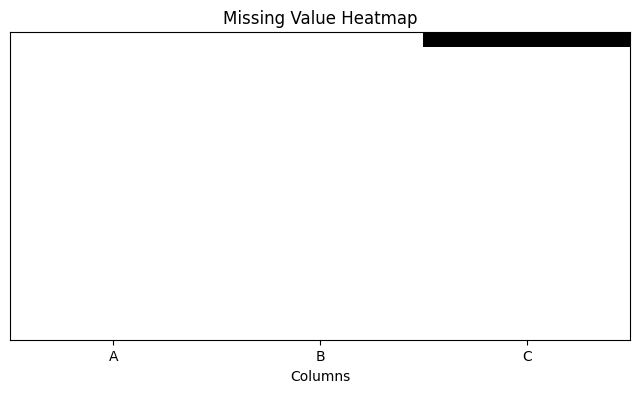

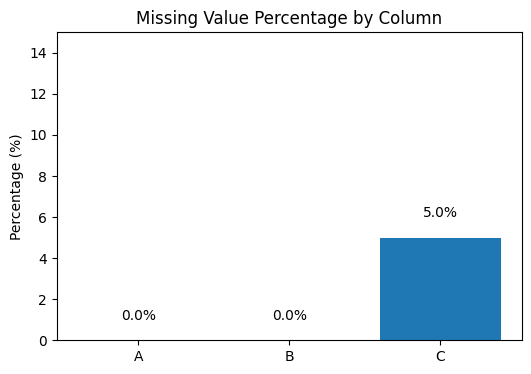

        A      B
5    True  False
6   False  False
7   False  False
8   False  False
9   False  False
..    ...    ...
95  False  False
96  False  False
97  False  False
98  False  False
99  False  False

[95 rows x 2 columns]


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    # 1) 샘플 데이터 생성
    np.random.seed(42)
    n = 100
    # A, B 컬럼에 정규분포 데이터 + 일부 이상치 추가
    A = np.random.normal(loc=10, scale=2, size=n)
    B = np.random.normal(loc=5, scale=1, size=n)
    A[[5, 15, 25]] = [20, 22, 25]    # A에 이상치
    B[[10, 20, 30]] = [0, 100, 95]   # B에 이상치
    # C 컬럼에 5개 결측치
    C = np.random.rand(n)
    C[[0, 1, 2, 3, 4]] = np.nan

    df = pd.DataFrame({'A': A, 'B': B, 'C': C})

    # 2) 결측치 시각화: Heatmap
    plt.figure(figsize=(8, 4))
    plt.imshow(df.isnull(), aspect='auto', cmap='gray_r')
    plt.yticks([])
    plt.xticks(range(len(df.columns)), df.columns)
    plt.title('Missing Value Heatmap')
    plt.xlabel('Columns')
    plt.show()

    # 3) 결측치 비율 막대그래프
    miss_ratio = df.isnull().mean() * 100
    plt.figure(figsize=(6, 4))
    plt.bar(miss_ratio.index, miss_ratio.values)
    for i, v in enumerate(miss_ratio.values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')
    plt.ylim(0, miss_ratio.max() + 10)
    plt.title('Missing Value Percentage by Column')
    plt.ylabel('Percentage (%)')
    plt.show()



    # 4) 이상치 탐지 (Z-score 기준)
    from scipy import stats
    z_scores = np.abs(stats.zscore(df[['A', 'B']]))
    outlier_mask = (z_scores > 3)
    print(outlier_mask[:])

    # 플래그 컬럼 추가
    df['A_outlier'] = outlier_mask[:, 0]
    df['B_outlier'] = outlier_mask[:, 1]

    # 5) 박스플롯으로 이상치 시각화
    plt.figure(figsize=(6, 4))
    plt.boxplot([df['A'], df['B']], labels=['A', 'B'], showfliers=True)
    plt.title('Outlier Boxplot for A and B')
    plt.show()

    # 6) 산점도로 이상치 강조
    plt.figure(figsize=(6, 4))
    # 정상치
    normal = df[~(df['A_outlier'] | df['B_outlier'])]
    plt.scatter(normal['A'], normal['B'], label='Normal', alpha=0.6)
    # 이상치
    outliers = df[df['A_outlier'] | df['B_outlier']]
    plt.scatter(outliers['A'], outliers['B'], color='red', label='Outlier')
    plt.xlabel('A')
    plt.ylabel('B')
    plt.title('Scatter Plot with Outliers Highlighted')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


# example7_advanced_imputation

In [ ]:


import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def main():
    # 다변량 결측치 예제
    np.random.seed(0)
    X = np.random.normal(size=(100, 3))
    # 일부러 결측치 삽입
    mask = np.random.rand(*X.shape) < 0.1
    X[mask] = np.nan
    df = pd.DataFrame(X, columns=['Feat1','Feat2','Feat3'])

    print("=== Before Imputation ===")
    print(df.isnull().sum(), "\n")

    # Iterative Imputer 적용
    imp = IterativeImputer(random_state=0)
    X_imp = imp.fit_transform(df)
    df_imp = pd.DataFrame(X_imp, columns=df.columns)

    print("=== After Imputation ===")
    print(df_imp.isnull().sum())

if __name__ == "__main__":
    main()
